# <font color='800000'>Regression Model </font>

### 1) Preliminary EDA & Feature Selection

In [260]:
full_df = pd.read_pickle('dataframe.pkl') 
#this file saves our dataframe so we don't have to collecting data file

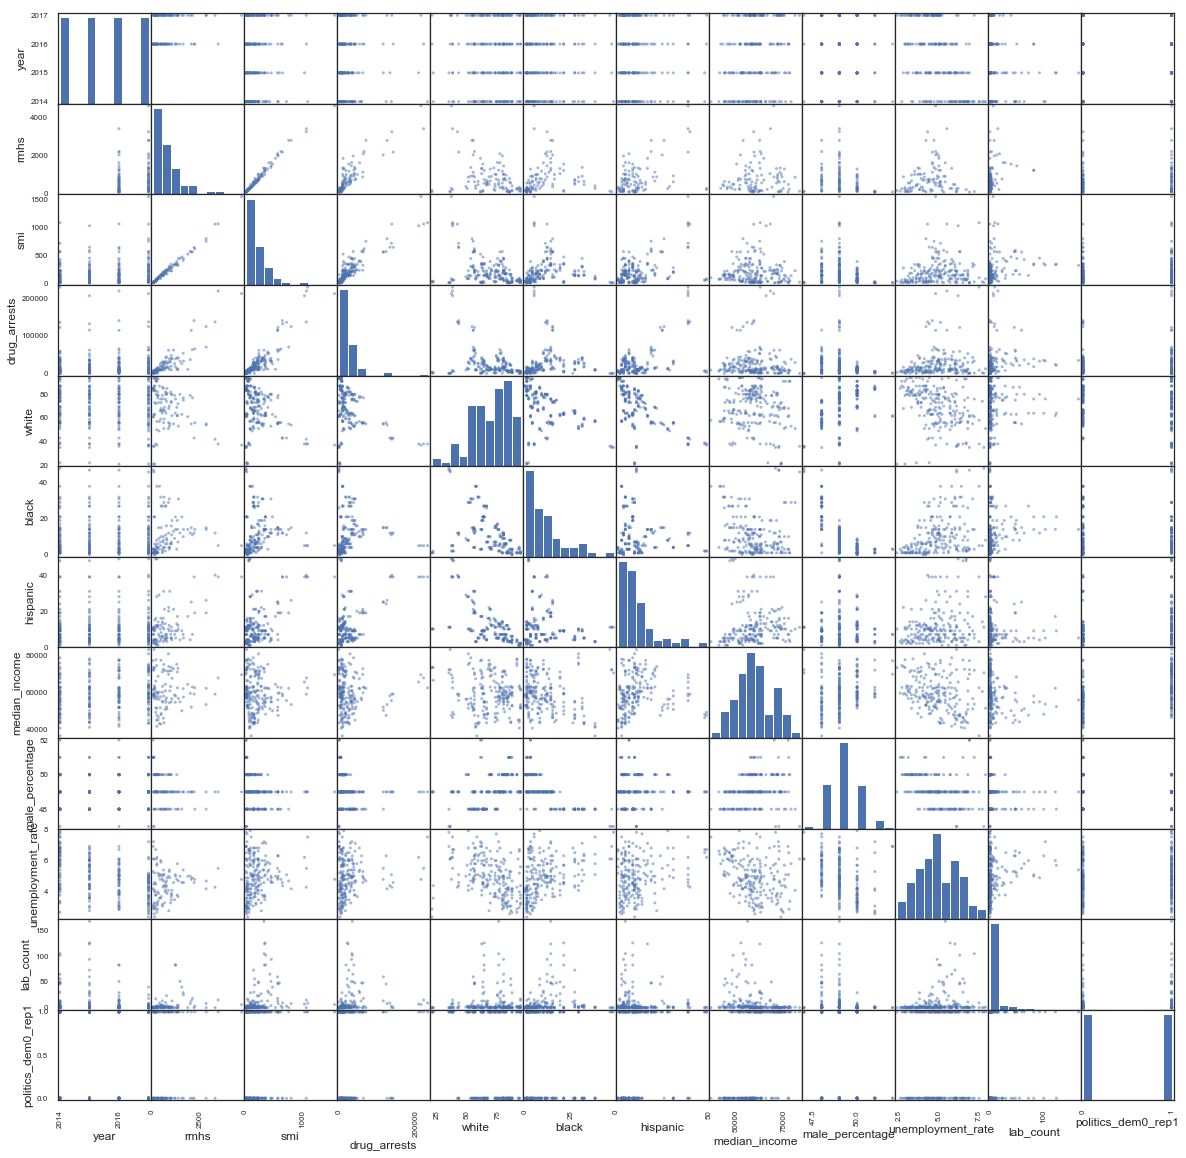

In [250]:
#look at scatter matrix to have overview if there are linear relationships
pd.plotting.scatter_matrix(full_df, figsize = [20,20]);

In [261]:
########################## Feature Selection ############################################

# do this to see what features to get rid of; you don't want highly correlated features
corr = full_df.corr()
abs(corr) > 0.75 #choose 75 as cutoff to see if the features are highly correlated w/one another


,year,rmhs,smi,drug_arrests,white,black,hispanic,median_income,male_percentage,unemployment_rate,lab_count,politics_dem0_rep1
year,True,False,False,False,False,False,False,False,False,False,False,False
rmhs,False,True,True,True,False,False,False,False,False,False,False,False
smi,False,True,True,True,False,False,False,False,False,False,False,False
drug_arrests,False,True,True,True,False,False,False,False,False,False,False,False
white,False,False,False,False,True,False,False,False,False,False,False,False
black,False,False,False,False,False,True,False,False,False,False,False,False
hispanic,False,False,False,False,False,False,True,False,False,False,False,False
median_income,False,False,False,False,False,False,False,True,False,False,False,False
male_percentage,False,False,False,False,False,False,False,False,True,False,False,False
unemployment_rate,False,False,False,False,False,False,False,False,False,True,False,False


#### <font color='black'>_the result of the table above tells us that we can keep all our features thus far_</font>

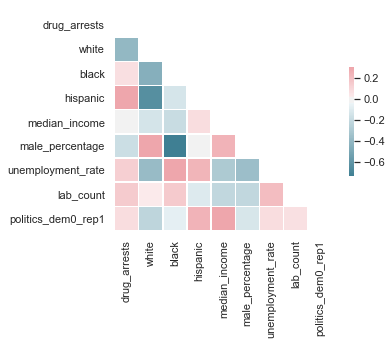

In [252]:
# can also look at heat maps to see correlation. don't want values
mask = np.zeros_like(corr, dtype=np.bool)
cmap = sns.diverging_palette(220, 10, as_cmap=True) #sets the color
mask[np.triu_indices_from(mask)] = True 

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

###  <font color = 'blue'> 2.1) Linear Regression Model - iteration 1 </font>

#### Here are the descriptions of our first model:
    - test size = 20% of our data 


If you have multiple predictor variables in a regression, here is advice from Tabachnick & Fidell, Using Multivariate Statistics (k is the number of predictors)

a minimum N > 50 + (8*k) for tests of multiple R

a minimum N > 104 + k for tests of individual predictors

In [283]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing


In [293]:
#spit your dataframe into the y's (target) and x's (features)
target = full_df.smi
features = full_df.iloc[:,4:]

In [285]:
######################## Split data into Testing & Training pools #############################
# choose random_state so that you only pick the exact same things every time you run your model
# choose a test size of 0.2 (20%) of all your data will be used to train model
X_train, X_test, Y_train, Y_test = train_test_split(features, \
                                                    target, random_state=1989,test_size=0.2)


In [286]:
X = X_train
y_sm = Y_train

X_sm = sm.add_constant(X)
sm_model = sm.OLS(y_sm, X_sm).fit()

sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    smi   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     80.47
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           1.84e-53
Time:                        18:33:05   Log-Likelihood:                -975.19
No. Observations:                 163   AIC:                             1970.
Df Residuals:                     153   BIC:                             2001.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                919.9607    749.159      1.228      0.221    -560.070    2399.992
drug_arrests           0.0052      0.000     20.474      0.000       0.005       0.006
white                  0.5693      0.921      0.618      0.537      -1.250       2.389
black                  0.3199      1.400      0.228      0.820      -2.446       3.086
hispanic               1.5086      1.412      1.068      0.287      -1.282       4.299
median_income          0.0012      0.001      0.993      0.322      -0.001       0.003
male_percentage      -18.8815     15.506     -1.218      0.225     -49.514      11.751
unemployment_rate    -10.5320      8.278     -1.272      0.205     -26.887       5.823
lab_count              1.1323      0.328      3.449      0.001       0.484       1.781
politics_dem0_rep1    -3.2149     21.875     -0.147      0.883     -46.431      40.001
==============================================================================
Omnibus:                       49.982   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.602
Skew:                           1.365   Prob(JB):                     4.31e-24
Kurtosis:                       5.897   Cond. No.                     6.54e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###  <font color = 'blue'>2.2) Linear Regression Model - iteration 2</font>

#### Here are the descriptions of our first model:
    - test size = 20% of our data 
    - scaled our data with preprocessing.StandardScaler
    - used polynomial fit with degree of 2


In [265]:
#scale the features, except your dummy variable, to linearize relationships that may not be linear
scaler = preprocessing.StandardScaler()
scaler.fit(X_train.iloc[:, :-1]) #computes the mean and stf to be used for later scaling

# TRAIN: 
features_scaled_train = pd.DataFrame(scaler.transform(X_train.iloc[:,:-1]), \
                                     columns=X_train.columns[:-1], index=X_train.index) #transform the data per standardization
features_scaled_train['politics_dem0_rep1'] = X_train.politics_dem0_rep1


# TEST
features_scaled_test = pd.DataFrame(scaler.transform(X_test.iloc[:,:-1]), \
                                    columns=X_test.columns[:-1], index=X_test.index)
features_scaled_test['politics_dem0_rep1'] = X_test.politics_dem0_rep1

features_scaled_test.head()

,drug_arrests,white,black,hispanic,median_income,male_percentage,unemployment_rate,lab_count,politics_dem0_rep1
95,-0.303997,0.666629,-0.953873,0.210961,0.956823,1.118831,-1.144385,-0.435129,0
5,-0.344598,0.049590,-0.683471,0.881452,0.404693,1.118831,0.034616,-0.397017,1
0,-0.693385,-0.135521,1.299479,-0.746884,-1.575158,-1.175124,1.550474,-0.015899,0
121,-0.555312,1.592187,-0.863739,-0.938453,-0.742970,-0.028147,-0.975956,0.212771,1
100,-0.028673,0.851741,-0.503203,-0.459530,-0.190532,1.118831,-0.386456,-0.435129,1


In [266]:
# Transform features selection to be polynomial. 
# This means that there will be more features to select from. We do this because some features
# don't have a linear relationship with the target variable. We arbitrarily choose degree = 2 polynomial

poly = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
features_train = pd.DataFrame(poly.fit_transform(features_scaled_train), columns=poly.get_feature_names(features_scaled_train.columns))
pd.set_option('display.max_columns', 300)
features_train.head()

,drug_arrests,white,black,hispanic,median_income,male_percentage,unemployment_rate,lab_count,politics_dem0_rep1,drug_arrests^2,drug_arrests white,drug_arrests black,drug_arrests hispanic,drug_arrests median_income,drug_arrests male_percentage,drug_arrests unemployment_rate,drug_arrests lab_count,drug_arrests politics_dem0_rep1,white^2,white black,white hispanic,white median_income,white male_percentage,white unemployment_rate,white lab_count,white politics_dem0_rep1,black^2,black hispanic,black median_income,black male_percentage,black unemployment_rate,black lab_count,black politics_dem0_rep1,hispanic^2,hispanic median_income,hispanic male_percentage,hispanic unemployment_rate,hispanic lab_count,hispanic politics_dem0_rep1,median_income^2,median_income male_percentage,median_income unemployment_rate,median_income lab_count,median_income politics_dem0_rep1,male_percentage^2,male_percentage unemployment_rate,male_percentage lab_count,male_percentage politics_dem0_rep1,unemployment_rate^2,unemployment_rate lab_count,unemployment_rate politics_dem0_rep1,lab_count^2,lab_count politics_dem0_rep1,politics_dem0_rep1^2
0,-0.647245,1.160260,-1.044007,-0.746884,-0.617374,1.118831,-0.639099,-0.397017,0.0,0.418927,-0.750973,0.675729,0.483417,0.399592,-0.724158,0.413654,0.256968,-0.000000,1.346203,-1.211320,-0.866579,-0.716314,1.298135,-0.741521,-0.460643,0.000000,1.089951,0.779752,0.644543,-1.168067,0.667224,0.414489,-0.000000,0.557835,0.461106,-0.835637,0.477333,0.296526,-0.000000,0.381150,-0.690737,0.394563,0.245108,-0.000000,1.251783,-0.715044,-0.444195,0.000000,0.408448,0.253733,-0.000000,0.157623,-0.000000,0.0
1,0.177722,0.419814,0.217870,-0.651099,-0.154399,-0.028147,-0.302242,0.517666,0.0,0.031585,0.074610,0.038720,-0.115714,-0.027440,-0.005002,-0.053715,0.092000,0.000000,0.176243,0.091465,-0.273340,-0.064819,-0.011816,-0.126885,0.217323,0.000000,0.047467,-0.141855,-0.033639,-0.006132,-0.065849,0.112784,0.000000,0.423930,0.100529,0.018326,0.196789,-0.337052,-0.000000,0.023839,0.004346,0.046666,-0.079927,-0.000000,0.000792,0.008507,-0.014571,-0.000000,0.091350,-0.156460,-0.000000,0.267978,0.000000,0.0
2,0.320724,0.419814,0.488272,-0.651099,-1.047901,-1.175124,0.539902,0.441442,0.0,0.102864,0.134644,0.156601,-0.208823,-0.336087,-0.376891,0.173159,0.141581,0.000000,0.176243,0.204983,-0.273340,-0.439923,-0.493333,0.226658,0.185323,0.000000,0.238410,-0.317914,-0.511661,-0.573781,0.263619,0.215544,0.000000,0.423930,0.682287,0.765123,-0.351530,-0.287423,-0.000000,1.098096,1.231413,-0.565763,-0.462587,-0.000000,1.380917,-0.634452,-0.518749,-0.000000,0.291494,0.238335,0.000000,0.194871,0.000000,0.0
3,-0.547255,-0.320633,0.848809,-0.267961,0.056361,-1.175124,-0.049599,-0.435129,1.0,0.299488,0.175468,-0.464515,0.146643,-0.030844,0.643093,0.027143,0.238127,-0.547255,0.102806,-0.272156,0.085917,-0.018071,0.376784,0.015903,0.139517,-0.320633,0.720476,-0.227448,0.047840,-0.997456,-0.042100,-0.369341,0.848809,0.071803,-0.015103,0.314888,0.013291,0.116598,-0.267961,0.003177,-0.066231,-0.002795,-0.024524,0.056361,1.380917,0.058285,0.511331,-1.175124,0.002460,0.021582,-0.049599,0.189337,-0.435129,1.0
4,-0.380481,0.049590,-0.773605,0.115176,1.659219,1.118831,-0.133813,-0.435129,1.0,0.144766,-0.018868,0.294342,-0.043822,-0.631301,-0.425694,0.050913,0.165558,-0.380481,0.002459,-0.038363,0.005712,0.082281,0.055483,-0.006636,-0.021578,0.049590,0.598464,-0.089101,-1.283580,-0.865533,0.103518,0.336618,-0.773605,0.013266,0.191103,0.128863,-0.015412,-0.050117,0.115176,2.753007,1.856385,-0.222025,-0.721974,1.659219,1.251783,-0.149714,-0.486836,1.118831,0.017906,0.058226,-0.133813,0.189337,-0.435129,1.0


In [294]:
X = features_train
y_sm = list(Y_train)

X_sm = sm.add_constant(X) #why do we do this?
sm_model = sm.OLS(y_sm, X_sm).fit()

sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     24.74
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           1.25e-41
Time:                        18:44:13   Log-Likelihood:                -908.30
No. Observations:                 163   AIC:                             1925.
Df Residuals:                     109   BIC:                             2092.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  306.2366     27.231     11.246      0.000     252.266     360.207
drug_arrests                           150.8499     57.008      2.646      0.009      37.862     263.838
white                                  -16.6603     82.155     -0.203      0.840    -179.489     146.169
black                                  119.7596     62.844      1.906      0.059      -4.796     244.315
hispanic                                57.2299     67.406      0.849      0.398     -76.367     190.827
median_income                           10.2055     30.987      0.329      0.743     -51.209      71.620
male_percentage                          8.6959     41.346      0.210      0.834     -73.250      90.642
unemployment_rate                      -51.8149     20.732     -2.499      0.014     -92.905     -10.725
lab_count                               23.1425     50.647      0.457      0.649     -77.239     123.524
politics_dem0_rep1                       6.4143     15.747      0.407      0.685     -24.796      37.625
drug_arrests^2                          -9.9564     23.897     -0.417      0.678     -57.319      37.406
drug_arrests white                    -491.9458    170.494     -2.885      0.005    -829.859    -154.033
drug_arrests black                    -435.8641    112.436     -3.877      0.000    -658.709    -213.019
drug_arrests hispanic                 -384.9898    117.428     -3.279      0.001    -617.728    -152.251
drug_arrests median_income            -160.9315     39.926     -4.031      0.000    -240.064     -81.799
drug_arrests male_percentage           -22.8703     39.708     -0.576      0.566    -101.569      55.829
drug_arrests unemployment_rate         -44.8538     15.110     -2.969      0.004     -74.800     -14.907
drug_arrests lab_count                 -53.2148     33.805     -1.574      0.118    -120.214      13.785
drug_arrests politics_dem0_rep1         52.4739     48.934      1.072      0.286     -44.513     149.460
white^2                               -106.6774     38.502     -2.771      0.007    -182.986     -30.369
white black                             54.9985    157.385      0.349      0.727    -256.932     366.930
white hispanic                          72.5895    159.452      0.455      0.650    -243.440     388.619
white median_income                    -40.8921     33.971     -1.204      0.231    -108.222      26.437
white male_percentage                   61.0224     69.819      0.874      0.384     -77.357     199.402
white unemployment_rate                -22.7956     26.351     -0.865      0.389     -75.023      29.432
white lab_count                        -26.5303    148.053     -0.179      0.858    -319.966     266.905
white politics_dem0_rep1              

- mean_absolute_error (MAE) = is a measure of difference between btw. two variables. for our purposes - test & predicted
- mean_squared_error (MSE) =  average squared difference between the estimated values and what is estimated. This accounts for outliers. More outliers means, bigger MSE, or more larger errors, penalizes big errors more
- root_mean_sqrt_squared_error (RMSE) = frequently used measure of the differences between values (sample or population values) predicted by a model. this tries to put it back in the same unit as the variable it is measuring.
- RMSE/sigma = tells you how many std. dev. you are from the real

###  <font color = 'blue'>2.3) Linear Regression Model - iteration 3</font>

#### Here are the descriptions of our first model:
    - test size = 20% of our data 
    - scaled our data with preprocessing.StandardScaler
    - used polynomial fit with degree of 2
    - Variance Test


In [268]:
from sklearn.feature_selection import VarianceThreshold


In [269]:
#passes data with threshold and drops the variables that have variance lower 
#than the threshold (meaning value = 0 or threshold)
# you do this to eliminate non-varying variables
def variance_threshold_selector(data, threshold=0.5):
    #set threshold to 0.5 because it's standard
    selector = VarianceThreshold(threshold) #Feature selector that removes all low-variance features.
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [270]:
features_selected_train = variance_threshold_selector(features_train, threshold=0.7)

len(features_train.columns), len(features_selected_train.columns)
#as you can see, 14 variables were dropped (54 to 40) due to being below threshold

(54, 33)

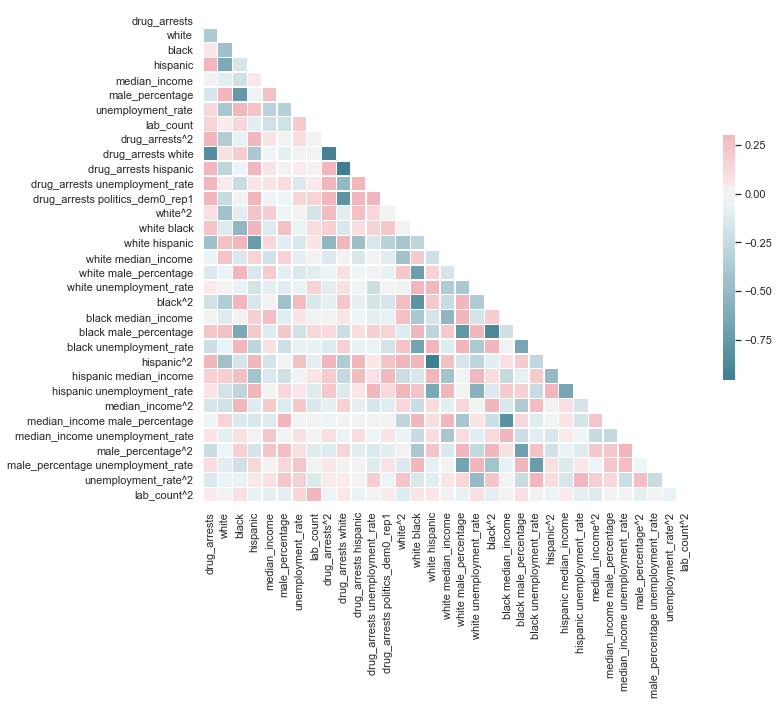

In [271]:
import seaborn as sns

sns.set(style="white")

# Compute the correlation matrix
corr = features_selected_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [272]:
# Create correlation matrix
corr_matrix = features_selected_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
# we dont want features that are highly correlated with each other
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

features_selected_train.drop(columns=to_drop, inplace=True)

len(to_drop), len(features_selected_train.columns)
# as you can see, we dropped 4 variables. now we have 36 features

/Users/PB/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(1, 32)

In [273]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

In [287]:
def information_selector(X, Y, scoring, k=30):
    selector = SelectKBest(score_func=scoring, k=k)
    selector.fit(X, Y)
    return X[X.columns[selector.get_support(indices=True)]]

test = SelectKBest(score_func=mutual_info_regression, k=30)
fit = test.fit(features_selected_train, Y_train)

features_selected_train[features_selected_train.columns[fit.get_support(indices=True)]].head()
len(features_selected_train.columns)


32

In [288]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(features_selected_train, Y_train)

In [291]:
features_test = pd.DataFrame(poly.fit_transform(features_scaled_test), \
                             columns=poly.get_feature_names(features_scaled_test.columns))

features_selected_test = features_test[features_selected_train.columns]
y_pred = model.predict(features_selected_test)

print(f'R^2: {lm.score(features_selected_train, Y_train)}')
print(f'MAE: {metrics.mean_absolute_error(Y_test, y_pred)}')
print(f'MSE: {metrics.mean_squared_error(Y_test, y_pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(Y_test, y_pred))}')
print(f'stddev: {np.sqrt(metrics.mean_squared_error(Y_test, y_pred))/ Y_test.std()}')

R^2: 0.8852692723903265
MAE: 53.45048506149804
MSE: 4553.983920697044
RMSE: 67.4832121397392
stddev: 0.33375623528132725


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     31.35
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           8.32e-47
Time:                        18:35:36   Log-Likelihood:                -941.06
No. Observations:                 163   AIC:                             1948.
Df Residuals:                     130   BIC:                             2050.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               264.1038     15.672     16.852      0.000     233.099     295.108
drug_arrests                        199.0375     29.439      6.761      0.000     140.797     257.278
white                                 4.0532     45.624      0.089      0.929     -86.209      94.315
black                                10.8027     36.811      0.293      0.770     -62.023      83.629
hispanic                             77.4808     41.563      1.864      0.065      -4.746     159.708
median_income                        24.3091     11.858      2.050      0.042       0.850      47.768
male_percentage                     -19.5443     16.165     -1.209      0.229     -51.524      12.436
unemployment_rate                   -28.6751     11.867     -2.416      0.017     -52.152      -5.198
lab_count                            47.7998     19.030      2.512      0.013      10.152      85.448
drug_arrests^2                       -2.4852     14.323     -0.174      0.863     -30.822      25.852
drug_arrests white                   18.2653     32.249      0.566      0.572     -45.536      82.067
drug_arrests unemployment_rate      -10.1509     12.224     -0.830      0.408     -34.334      14.032
drug_arrests politics_dem0_rep1     -46.9812     26.189     -1.794      0.075     -98.793       4.831
white^2                             -80.7598     23.794     -3.394      0.001    -127.833     -33.687
white black                         181.6866     69.099      2.629      0.010      44.983     318.390
white hispanic                     -351.5957     81.762     -4.300      0.000    -513.351    -189.840
white median_income                 -40.7973     30.286     -1.347      0.180    -100.715      19.120
white male_percentage               108.1234     27.874      3.879      0.000      52.979     163.268
white unemployment_rate             -19.7671     23.275     -0.849      0.397     -65.814      26.280
black^2                             154.4283     51.292      3.011      0.003      52.953     255.904
black median_income                 -16.4997     26.042     -0.634      0.527     -68.020      35.021
black male_percentage                68.5907     33.694      2.036      0.044       1.932     135.249
black unemployment_rate             -24.2261     21.577     -1.123      0.264     -66.914      18.462
hispanic^2                         -203.4314     53.150     -3.828      0.000    -308.581     -98.281
hispanic median_income              -15.0727     28.081     -0.537      0.592     -70.628      40.483
hispanic unemployment_rate          -56.0469     24.451     -2.292      0.024    -104.420      -7.673
median_income^2                     -24.4308      9.436     -2.589      0.011     -43.098      -5.763
median_income male_perc

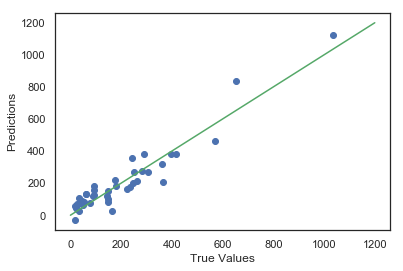

In [292]:
g = range(1200)
plt.scatter(Y_test, y_pred)
plt.plot(g,g,c='g')
plt.xlabel('True Values')
plt.ylabel('Predictions')

X = features_selected_train
y_sm = list(Y_train)

X_sm = sm.add_constant(X)
sm_model = sm.OLS(y_sm, X_sm).fit()

sm_model.summary()
#p values suck even if r^2 is great. move onto next iteration

###  <font color = 'blue'>2.4) Linear Regression Model - iteration 4</font>

#### Here are the descriptions of our first model:
    - test size = 20% of our data 
    - scaled our data with preprocessing.StandardScaler
    - used polynomial fit with degree of 2
    - Variance Test
    - Wrapper Method - RFE


In [239]:
from sklearn.feature_selection import RFE

In [280]:
rfe = RFE(lm, n_features_to_select= 5) #feature ranking with recursive feature elimination
rfe.fit(features_selected_train,y_train)

def ranking(ranks, names, order=1):

    ranks = map(lambda x: round(x,2), ranks)
    return list(sorted(zip(ranks, names),reverse=True))

rankings = ranking(np.abs(lm.coef_), features_selected_train.columns) #returns list of tuples in form of (coeff,feature)

In [282]:
final_columns = [item[1] for item in rankings[0:15]]

lm = linear_model.LinearRegression()
model = lm.fit(features_selected_train[final_columns], Y_train)

features_selected_test = features_selected_test[final_columns]
y_pred = model.predict(features_selected_test)

print(f'R^2: {model.score(features_selected_train[final_columns], Y_train)}')
print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'stddev: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.std()}')

R^2: 0.7532141820656553
MAE: 186.4425525523429
MSE: 67513.93466645818
RMSE: 259.83443702954037
stddev: 1.5187469884256375


In [242]:
X = features_selected_train[final_columns]
y_sm = list(Y_train)

X_sm = sm.add_constant(X)
sm_model = sm.OLS(y_sm, X_sm).fit()

sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     1.550
Date:                Thu, 06 Dec 2018   Prob (F-statistic):             0.0949
Time:                        18:17:15   Log-Likelihood:                -1110.0
No. Observations:                 163   AIC:                             2252.
Df Residuals:                     147   BIC:                             2301.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        187.6548     29.453      6.371      0.000     129.449     245.861
hispanic                    -124.2585     74.199     -1.675      0.096    -270.892      22.376
white                        -93.1108     87.840     -1.060      0.291    -266.703      80.481
white hispanic                 1.8159     41.362      0.044      0.965     -79.925      83.556
white median_income           96.0535     63.495      1.513      0.132     -29.428     221.535
drug_arrests white           -26.3468     20.505     -1.285      0.201     -66.869      14.175
black median_income           56.0475     41.834      1.340      0.182     -26.627     138.722
white black                   88.0251     51.061      1.724      0.087     -12.883     188.933
white unemployment_rate      -69.0777     49.255     -1.402      0.163    -166.418      28.263
black unemployment_rate      -17.3556     40.385     -0.430      0.668     -97.166      62.455
hispanic median_income        87.7907     56.667      1.549      0.123     -24.196     199.778
hispanic unemployment_rate   -37.1280     45.602     -0.814      0.417    -127.248      52.992
white male_percentage         64.8799     34.243      1.895      0.060      -2.792     132.552
black                        -53.2161     64.719     -0.822      0.412    -181.116      74.684
white^2                       35.3922     44.675      0.792      0.430     -52.896     123.681
lab_count                     10.9032     20.360      0.536      0.593     -29.333      51.139
==============================================================================
Omnibus:                      109.947   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              898.056
Skew:                           2.410   Prob(JB):                    9.76e-196
Kurtosis:                      13.440   Cond. No.                         19.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0,0.5,'Predictions')

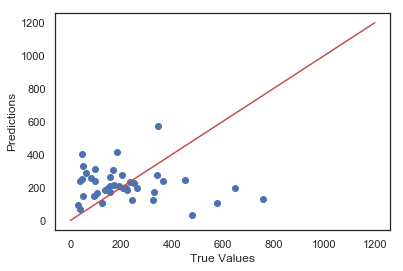

In [243]:
g = range(1200)
plt.scatter(y_test, y_pred)
plt.plot(g,g, c='r')
plt.xlabel('True Values')
plt.ylabel('Predictions')


###  <font color = 'blue'>2.4) Linear Regression Model - iteration 4</font>

#### Here are the descriptions of our first model:
    - test size = 20% of our data 
    - scaled our data with preprocessing.StandardScaler
    - used polynomial fit with degree of 2
    - Variance Test
    - Wrapper Method - RFE
    - took features with p-values <0.05


# <font color='800000'>-- Maybe (Some PDF, CDFs, KDEs, Scatter Plots) --</font>

In [58]:
full_df.describe()

,year,rmhs,smi,drug_arrests,white,black,hispanic,median_income,male_percentage,unemployment_rate,lab_count,politics_dem0_rep1
count,204.000000,102.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.00000
mean,2015.500000,806.676471,215.936275,26323.132353,68.911765,10.897059,11.632353,59579.352941,49.078431,4.926471,10.470588,0.50000
std,1.120784,809.163719,224.742306,37749.445941,16.248442,10.671734,10.203695,9526.628447,0.889858,1.226266,24.773737,0.50123
min,2014.000000,61.000000,19.000000,220.000000,21.000000,0.000000,1.000000,36816.000000,47.000000,2.400000,0.000000,0.00000
25%,2014.750000,247.000000,61.750000,7024.500000,57.750000,3.000000,5.000000,52863.500000,48.000000,4.000000,0.000000,0.00000
50%,2015.500000,583.500000,156.000000,13510.000000,72.500000,7.000000,9.000000,59080.000000,49.000000,4.900000,1.000000,0.50000
75%,2016.250000,1023.250000,280.000000,32280.500000,81.000000,15.000000,13.250000,65731.250000,50.000000,5.825000,7.000000,1.00000
max,2017.000000,4633.000000,1556.000000,229083.000000,94.000000,48.000000,49.000000,83382.000000,52.000000,7.900000,168.000000,1.00000


In [96]:
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

/Users/PB/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


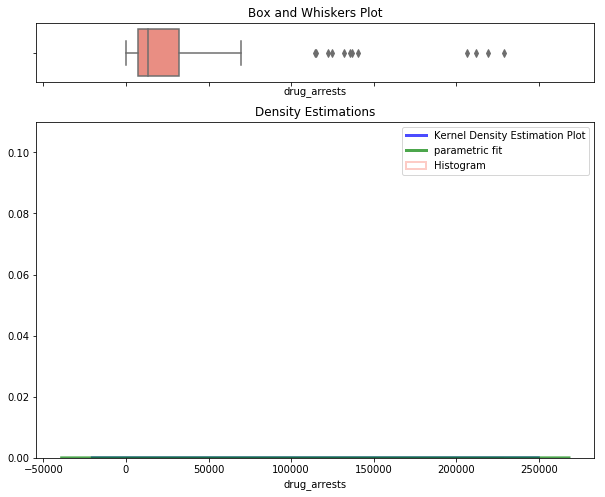

In [64]:
# Create two vertical subplots sharing 15% and 85% of plot space
# sharex allows sharing of axes i.e. building multiple plots on same axes
fig, (ax, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize = (10,8) )

sns.distplot(full_df.drug_arrests, 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "edgecolor" :'salmon',
                                  "alpha": 0.4, 
                                  "color":  "w",
                                  "label": "Histogram",
                                  },
             kde=True, kde_kws = {'linewidth': 3,
                                  'color': "blue",
                                  "alpha": 0.7,
                                  'label':'Kernel Density Estimation Plot'
                                 },
             fit= stats.norm, fit_kws = {'color' : 'green',
                                         'label' : 'parametric fit',
                                         "alpha": 0.7,
                                          'linewidth':3},
             ax=ax2)
ax2.set_title('Density Estimations')

sns.boxplot(x=full_df.drug_arrests, ax = ax,color = 'salmon')
ax.set_title('Box and Whiskers Plot')
ax2.set(ylim=(0, .08))
plt.ylim(0,0.11)
plt.legend()
